In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions=pd.read_csv('data/twm_transactions.csv',sep=';')

In [3]:
checking_tran=pd.read_csv('data/twm_checking_tran.csv',sep=';')

In [4]:
credit_tran=pd.read_csv('data/twm_credit_tran.csv',sep=';')

In [5]:
savings_tran=pd.read_csv('data/twm_savings_tran.csv',sep=';')

_______________

## Cleaning and transforming transactions Table

In [28]:
transactions.head(5)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [29]:
transactions.describe()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_time
count,77580.000000,7.758000e+04,77580.000000,77580.000000,77580.000000,77580.000000,77580.000000
mean,38.228332,1.185674e+15,-7.748275,-8.509662,0.762784,571.571177,104277.077984
std,27.838521,2.000564e+15,312.684674,311.006502,4.427059,2158.948572,87527.030938
min,1.000000,1.362480e+07,-3312.410000,-3312.410000,0.000000,-17300.000000,0.000000
25%,15.000000,1.362824e+07,-100.000000,-100.000000,0.000000,0.000000,0.000000
50%,32.000000,1.363199e+07,-1.815000,-1.815000,0.000000,180.400000,110626.000000
75%,59.000000,4.561143e+15,0.170000,0.000000,0.000000,957.252500,184245.250000
max,155.000000,4.561143e+15,17464.520000,17300.000000,164.520000,29868.390000,235959.000000


In [30]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_id        77580 non-null  int64  
 1   acct_nbr       77580 non-null  int64  
 2   tran_amt       77580 non-null  float64
 3   principal_amt  77580 non-null  float64
 4   interest_amt   77580 non-null  float64
 5   new_balance    77580 non-null  float64
 6   tran_date      77580 non-null  object 
 7   tran_time      77580 non-null  int64  
 8   channel        77580 non-null  object 
 9   tran_code      77580 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.9+ MB


## Identifying outliers in Transactions table

In [6]:
from scipy import stats

#Finding Z Score on Column
stats.zscore(transactions['tran_amt'])

#view the outliers
transactions['tran_amt'][(np.abs(stats.zscore(transactions['tran_amt'])) > 3)]

124      1070.85
158      1000.00
194     -1497.42
261      1438.27
266      1300.00
          ...   
77200    2125.59
77255     944.39
77421     980.19
77430   -1106.28
77531   -2815.52
Name: tran_amt, Length: 1351, dtype: float64

## Deleting outliers

In [7]:
transactions_clean=transactions[(np.abs(stats.zscore(transactions['tran_amt'])) <= 3)]
transactions_clean

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


----------------------------------

## Deleting unwanted columns

In [8]:
transactions_clean_df1 = transactions_clean.groupby(['acct_nbr']).count()
transactions_clean_df1 =transactions_clean_df1.drop(['tran_amt','principal_amt', 'interest_amt', 'new_balance', 'tran_date', 'tran_time', 'channel', 'tran_code'], axis = 1)
transactions_clean_df1 = transactions_clean_df1.rename(columns={'tran_id': 'transaction_count'})
transactions_clean_df1

,transaction_count
acct_nbr,
13624802,96
13624803,26
13624842,99
13624843,33
13624852,99
...,...
4561143213634830,74
4561143213634840,39
4561143213634850,22


In [9]:
transactions_clean_df2 = transactions_clean.groupby(['acct_nbr']).mean()
transactions_clean_df2 = transactions_clean_df2.drop(['tran_id','principal_amt','interest_amt','new_balance','tran_time'], axis = 1)
transactions_clean_df2 = transactions_clean_df2.rename(columns={'tran_amt': 'avg_tran_amt'})


transactions_clean_df2

,avg_tran_amt
acct_nbr,
13624802,-16.894167
13624803,18.550769
13624842,-25.435758
13624843,58.474545
13624852,-1.659495
...,...
4561143213634830,-39.011216
4561143213634840,12.080513
4561143213634850,-45.454545


In [46]:
result_tran_clean = pd.concat([transactions_clean_df1, transactions_clean_df2], axis=1, join="inner")
result_tran_clean.head()

,transaction_count,avg_tran_amt
acct_nbr,,
13624802,96,-16.894167
13624803,26,18.550769
13624842,99,-25.435758
13624843,33,58.474545
13624852,99,-1.659495


In [47]:
# exporting the cleaned data as a CSV file 
result_tran_clean.to_csv('data/result_tran_clean.csv',index=False)

-----------------------------

## Cleaning checking_tran Table

In [15]:
checking_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        46204 non-null  int64  
 1   tran_id        46204 non-null  int64  
 2   tran_amt       46204 non-null  float64
 3   principal_amt  46204 non-null  float64
 4   interest_amt   46204 non-null  float64
 5   new_balance    46204 non-null  float64
 6   tran_date      46204 non-null  object 
 7   tran_time      46204 non-null  object 
 8   channel        46204 non-null  object 
 9   tran_code      46204 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 3.5+ MB


In [16]:
checking_tran.describe()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance
count,4.620400e+04,46204.000000,46204.000000,46204.000000,46204.000000,46204.000000
mean,1.362998e+06,47.823175,-17.039341,-17.155132,0.115790,1152.162744
std,2.957497e+02,28.457501,246.405359,246.395847,0.845523,2009.266714
min,1.362480e+06,1.000000,-3312.410000,-3312.410000,0.000000,0.000000
25%,1.362740e+06,23.000000,-80.000000,-80.000000,0.000000,78.440000
50%,1.362997e+06,47.000000,-0.750000,-0.750000,0.000000,407.490000
75%,1.363262e+06,72.000000,0.000000,0.000000,0.000000,1522.675000
max,1.363495e+06,99.000000,5355.050000,5355.050000,27.300000,29868.390000


In [18]:
from scipy import stats

#Finding Z Score on Column
stats.zscore(checking_tran['tran_amt'])

#view the outliers
checking_tran['tran_amt'][(np.abs(stats.zscore(checking_tran['tran_amt'])) > 3)]

27       -817.25
59       1327.76
94      -1404.17
260      3314.96
300      1390.51
          ...   
46080    -773.40
46104    1143.11
46146     740.97
46190   -1218.90
46203    1261.26
Name: tran_amt, Length: 1021, dtype: float64

## Deleting outliers

In [19]:
checking_tran_clean=checking_tran[(np.abs(stats.zscore(checking_tran['tran_amt'])) <= 3)]
checking_tran_clean

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD
...,...,...,...,...,...,...,...,...,...,...
46198,1363284,59,-0.15,-0.15,0.0,145.67,4.3.1995,,,FK
46199,1363272,50,-0.15,-0.15,0.0,319.71,3.10.1995,,,FK
46200,1363393,61,-102.52,-102.52,0.0,57.47,22.1.1995,,P,WD
46201,1363365,25,-275.89,-275.89,0.0,2632.93,8.1.1995,,P,WD


In [48]:
checking_tran_clean=checking_tran_clean[['cust_id','tran_amt']]

In [49]:
# exporting the cleaned data as a CSV file 
checking_tran_clean.to_csv('data/checking_tran_clean.csv',index=False)

## Cleaning credit_tran Table

In [20]:
credit_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20167 entries, 0 to 20166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        20167 non-null  int64  
 1   tran_id        20167 non-null  int64  
 2   tran_amt       20167 non-null  float64
 3   principal_amt  20167 non-null  float64
 4   interest_amt   20167 non-null  float64
 5   new_balance    20167 non-null  float64
 6   tran_date      20167 non-null  object 
 7   tran_time      20167 non-null  object 
 8   channel        20167 non-null  object 
 9   tran_code      20167 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


In [21]:
credit_tran.describe()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance
count,2.016700e+04,20167.000000,20167.000000,20167.000000,20167.000000,20167.000000
mean,1.362987e+06,28.543065,0.773537,-1.429786,2.208701,-1130.349441
std,2.934641e+02,21.946014,455.914969,451.535918,8.135091,1377.689559
min,1.362480e+06,1.000000,-1565.500000,-1565.500000,0.000000,-17300.000000
25%,1.362730e+06,12.000000,-166.790000,-166.790000,0.000000,-1411.110000
50%,1.362980e+06,24.000000,-67.510000,-67.510000,0.000000,-766.210000
75%,1.363249e+06,40.000000,0.000000,0.000000,0.000000,-334.290000
max,1.363492e+06,155.000000,17464.520000,17300.000000,164.520000,0.000000


In [22]:
from scipy import stats

#Finding Z Score on Column
stats.zscore(credit_tran['tran_amt'])

#view the outliers
credit_tran['tran_amt'][(np.abs(stats.zscore(credit_tran['tran_amt'])) > 3)]

100      2000.40
121      1428.75
212     -1565.50
240      5384.21
288      1708.41
          ...   
19846    1534.27
20128    1653.86
20137    2071.77
20145    1784.96
20149    2573.78
Name: tran_amt, Length: 313, dtype: float64

## Deleting outliers

In [24]:
credit_tran_clean=credit_tran[(np.abs(stats.zscore(credit_tran['tran_amt'])) <= 3)]

credit_tran_clean.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [31]:
credit_tran_clean=credit_tran_clean[['cust_id','tran_amt']]
credit_tran_clean.describe()

,cust_id,tran_amt
count,1.985400e+04,19854.000000
mean,1.362988e+06,-36.236328
std,2.936307e+02,285.937809
min,1.362480e+06,-1355.900000
25%,1.362730e+06,-168.772500
50%,1.362985e+06,-70.130000
75%,1.363249e+06,0.000000
max,1.363492e+06,1363.980000


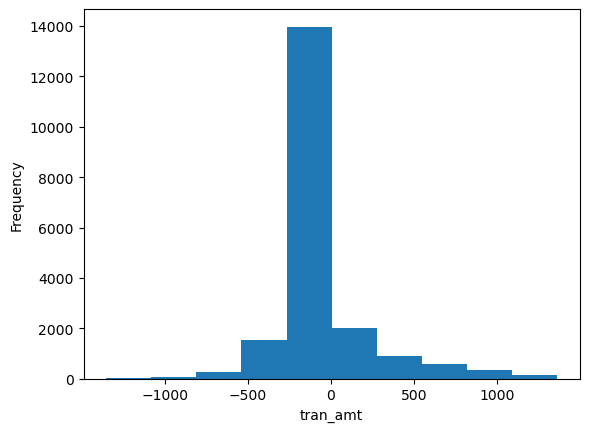

In [32]:
import matplotlib.pyplot as plt
# Create a histogram of the tran_amt column
plt.hist(credit_tran_clean['tran_amt'])
plt.xlabel('tran_amt')
plt.ylabel('Frequency')
plt.show()

In [43]:
# exporting the cleaned data as a CSV file 
credit_tran_clean.to_csv('data/credit_tran_clean.csv',index=False)

## Cleaning savings_tran Table

In [35]:
savings_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11189 entries, 0 to 11188
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        11189 non-null  int64  
 1   tran_id        11189 non-null  int64  
 2   tran_amt       11189 non-null  float64
 3   principal_amt  11189 non-null  float64
 4   interest_amt   11189 non-null  float64
 5   new_balance    11189 non-null  float64
 6   tran_date      11189 non-null  object 
 7   tran_time      11189 non-null  object 
 8   channel        11189 non-null  object 
 9   tran_code      11189 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 874.3+ KB


In [36]:
savings_tran.describe()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance
count,1.118900e+04,11189.000000,11189.000000,11189.000000,11189.000000,11189.000000
mean,1.362988e+06,16.113504,14.458362,13.628621,0.829741,1229.467968
std,2.979129e+02,11.024730,221.971173,222.003741,2.856393,2256.670395
min,1.362480e+06,1.000000,-2495.880000,-2495.880000,0.000000,0.070000
25%,1.362720e+06,7.000000,-0.750000,-0.750000,0.000000,238.480000
50%,1.362978e+06,14.000000,0.390000,0.000000,0.000000,562.040000
75%,1.363262e+06,23.000000,7.340000,0.000000,0.480000,1247.300000
max,1.363495e+06,62.000000,4478.610000,4478.610000,44.680000,26016.690000


In [37]:
from scipy import stats

#Finding Z Score on Column
stats.zscore(savings_tran['tran_amt'])

#view the outliers
savings_tran['tran_amt'][(np.abs(stats.zscore(savings_tran['tran_amt'])) > 3)]

9        1894.54
49       1191.32
154      3128.48
212     -1052.17
233       862.33
          ...   
10740   -1048.68
10854     914.30
10872    1019.58
10943    -783.64
11010    -784.99
Name: tran_amt, Length: 229, dtype: float64

## Deleting outliers

In [38]:
savings_tran_clean=savings_tran[(np.abs(stats.zscore(savings_tran['tran_amt'])) <= 3)]

savings_tran_clean.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [39]:
result_savings_tran_clean=savings_tran_clean[['cust_id','tran_amt']]
result_savings_tran_clean.describe()

,cust_id,tran_amt
count,1.096000e+04,10960.000000
mean,1.362987e+06,5.052805
std,2.986409e+02,132.095741
min,1.362480e+06,-648.590000
25%,1.362718e+06,-0.750000
50%,1.362978e+06,0.380000
75%,1.363264e+06,4.682500
max,1.363495e+06,670.770000


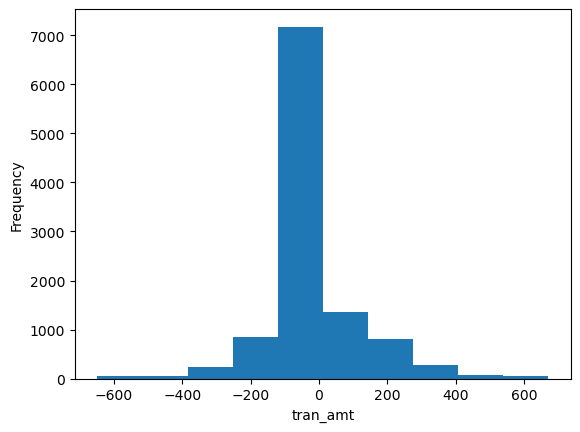

In [40]:
# Create a histogram of the tran_amt column
plt.hist(result_savings_tran_clean['tran_amt'])
plt.xlabel('tran_amt')
plt.ylabel('Frequency')
plt.show()

In [44]:
# exporting the cleaned data as a CSV file 
savings_tran_clean.to_csv('data/savings_tran_clean.csv',index=False)